# **Assignment 2**

### *Name: Kartik More*
### *Roll number: 43149*
### *Batch: R9*

*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow
    a. Import the necessary packages
    b. Load the training and testing data (MNIST/CIFAR10)
    c. Define the network architecture using Keras
    d. Train the model using SGD
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [1]:
import matplotlib.pyplot as plt
import keras

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


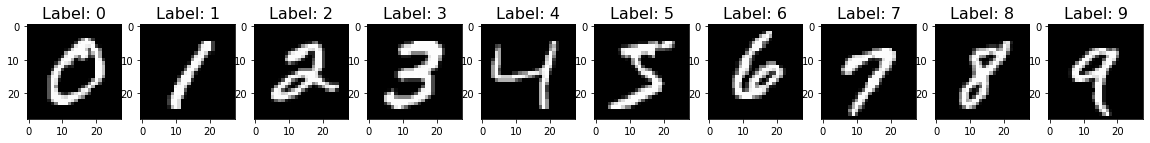

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [11]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [12]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

# Training the model using SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
batch_size = 512
epochs = 100

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
118/118 [==============================] - 2s 10ms/step - loss: 0.9176 - accuracy: 0.7362
Epoch 2/100
118/118 [==============================] - 1s 10ms/step - loss: 0.4180 - accuracy: 0.8772
Epoch 3/100
118/118 [==============================] - 1s 10ms/step - loss: 0.3471 - accuracy: 0.8997
Epoch 4/100
118/118 [==============================] - 1s 10ms/step - loss: 0.3020 - accuracy: 0.9120
Epoch 5/100
118/118 [==============================] - 1s 10ms/step - loss: 0.2735 - accuracy: 0.9213
Epoch 6/100
118/118 [==============================] - 1s 10ms/step - loss: 0.2518 - accuracy: 0.9270
Epoch 7/100
118/118 [==============================] - 1s 10ms/step - loss: 0.2331 - accuracy: 0.9324
Epoch 8/100
118/118 [==============================] - 1s 10ms/step - loss: 0.2167 - accuracy: 0.9372
Epoch 9/100
118/118 [==============================] - 1s 10ms/step - loss: 0.2013 - accuracy: 0.9413
Epoch 10/100
118/118 [==============================] - 1s 10ms/step - loss: 0.190

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9789
Test Loss: 0.07106763124465942, Test Accuracy: 0.9789000153541565


In [ ]:
# list all data in history
print(history.history.keys())


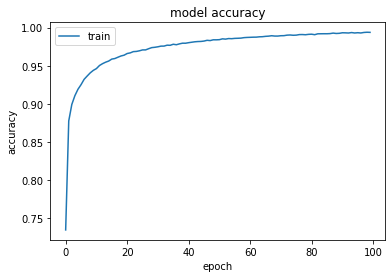

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


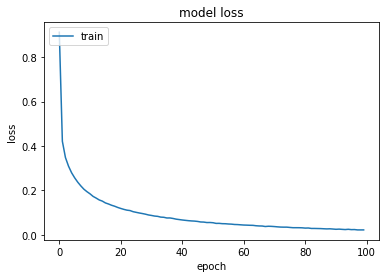

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()